# Graph for number of blacklisted liars when lies are fixed and number of liars increasing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
lowerBoundLies = 1000  #lower bound on difference between true latency and lie told about it
upperBoundLies = 50000 #upper bound on difference between true latency and lie told about it
nbNodes = 100
maxNbLiars = 33
#lieClusterSizes = [5, 10, 20, 33]
nbLiarCombinations = 100 #nb different combinations of liars chosen throughout test
randomLiars = True      #whether the liars are chosen randomly or within same cluster
withSuspects = True     #activate enhanced blacklisting

random = "random_liars"
if not randomLiars:
    random = "clustered_liars"

filename = "test_" + str(nbNodes) + "_nodes_up_to_" + \
    str(maxNbLiars) + "_liars" +\
    "_var_liars_distance_" + str(upperBoundLies) +\
    "_" + random +\
    "_" + str(nbLiarCombinations) + "_combinations"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/"+filename+".csv")

In [4]:
data

,node,is_liar,is_blacklisted,lie,lieClusterSize
0,N0,False,False,0,5
1,N2,False,False,0,5
2,N3,False,False,0,5
3,N4,False,False,0,5
4,N6,False,False,0,5
5,N8,False,False,0,5
6,N9,False,False,0,5
7,N11,False,False,0,5
8,N12,False,False,0,5
9,N13,False,False,0,5


In [5]:
df1 = data.copy()

In [6]:
df2 = df1[df1["is_liar"] == True][df1.is_blacklisted == True][["lieClusterSize", "is_blacklisted"]]
df2b = df1[df1["is_liar"]  == True][["lieClusterSize"]]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
df2

,lieClusterSize,is_blacklisted
20,5,True
21,5,True
22,5,True
23,5,True
24,5,True
25,5,True
26,5,True
27,5,True
28,5,True
29,5,True


In [8]:
df2["count"] = 1
df2b["total"] = 1

In [9]:
df3 = df2.groupby(["lieClusterSize", "is_blacklisted"]).sum().reset_index()
df3b = df2b.groupby(["lieClusterSize"]).sum().reset_index()

In [10]:
df3b

,lieClusterSize,total
0,5,48500
1,10,94500
2,15,138000
3,20,179000
4,25,217500
5,27,232200
6,30,253500
7,33,273900


In [11]:
df3

,lieClusterSize,is_blacklisted,count
0,5,True,48500
1,10,True,94500
2,15,True,138000
3,20,True,179000
4,25,True,217500
5,27,True,232112
6,30,True,230355
7,33,True,163098


In [12]:
df4 = df3.copy()


In [13]:
df4["proportion"] = df3["count"]/df3b["total"]

In [14]:
df4

,lieClusterSize,is_blacklisted,count,proportion
0,5,True,48500,1.000000
1,10,True,94500,1.000000
2,15,True,138000,1.000000
3,20,True,179000,1.000000
4,25,True,217500,1.000000
5,27,True,232112,0.999621
6,30,True,230355,0.908698
7,33,True,163098,0.595465


In [15]:
df5 = df4[["lieClusterSize", "proportion"]]

Text(0.5, 0, 'Number of liars in network')

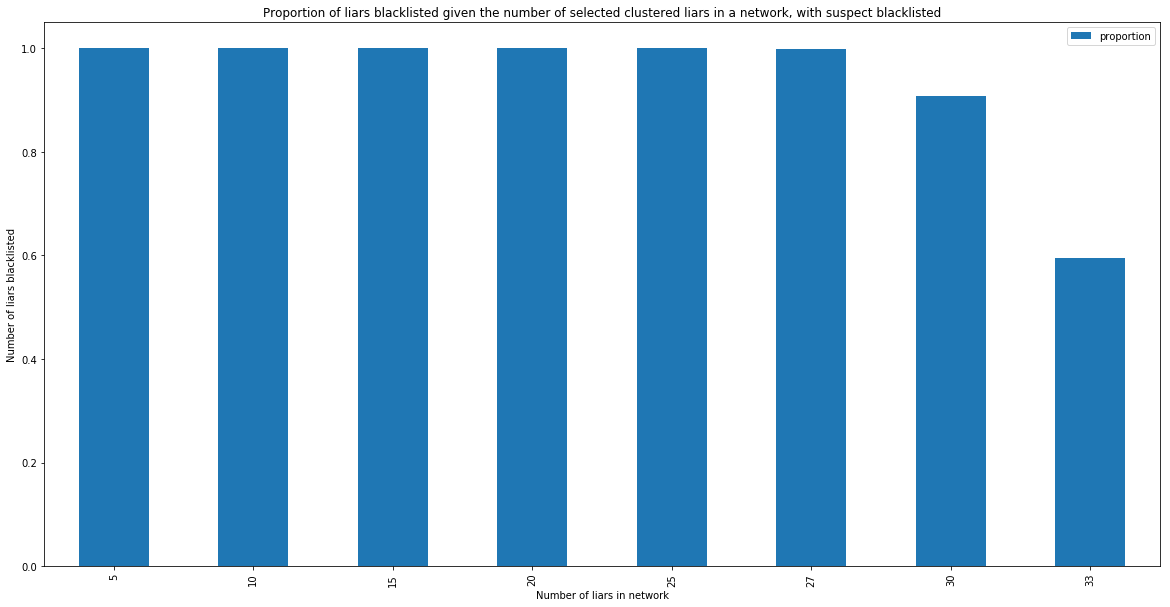

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
df5.plot.bar(
    stacked=True, ax=ax, x="lieClusterSize", 
    title="Proportion of liars blacklisted given the number of selected clustered liars in a network, "+\
    "with suspect blacklisted")

ax.set_ylabel("Proportion of liars blacklisted")
ax.set_xlabel("Number of liars in network")

In [17]:
fig.savefig('graphs/'+filename+'.png')